# K-Beauty 성장과 해외 직접 판매 경로 분석

URL: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

필요 라이브러리 호출
- 분석에 필요한 라이브러리
- 시각화에 필요한 라이브러리
- 시각화 폰트 및 깨짐현상 방지 코드

In [2]:
# 필요 라이브러리
import pandas as pd
import numpy as np

# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

import os

if os.name =='posix':
    sns.set(font = 'AppleGothic')
elif os.name == 'nt':
    sns.set(font = 'Malgun Gothic')

데이터 로드하기

## 분석 시각화를 위한 TIDY DATA 작성
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

(12600, 5)


,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


# 데이터 전처리

1) 기간에서 연도를 분리하기

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


2) 기간에서 분기를 분리하기

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


3) 금액을 수치 데이터로 변경

4) 국가 대륙별 합계와 상품군별 합계는 따로 구할 수 있기 때문에 제거하는 것이 필요해요

(12600, 7)
(10584, 7)


,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1


# K-Beauty 시각화

Q1. 판매유형별 == '계' 데이터를 추출해보자.(df_total로 변수 저장)

Q2. 연도별, 판매액(백만원)에 대한 Line Plot을 그려보자.

<AxesSubplot:xlabel='연도', ylabel='백만원'>

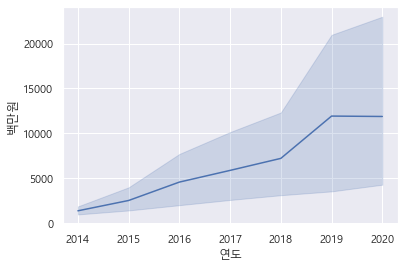

Q3. 상품군별 연도별, 판매액에 대한 Line Plot을 그려보자.

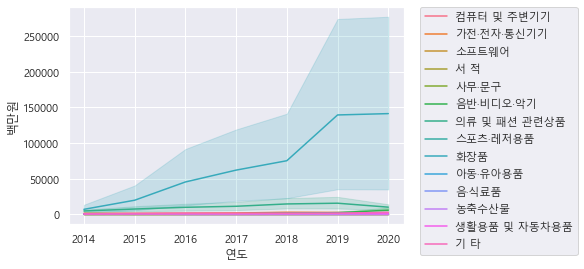

# 화장품의 온라인 쇼핑 직접 판매액

Q4. df_total 변수에서 상품군별 == '화장품' 데이터를 df_cosmetic 변수에 저장해보자.

Q5. df_cosmetic의 연도별 판매액을 Line plot으로 표현해보자.(hue = 분기)

<AxesSubplot:xlabel='연도', ylabel='백만원'>

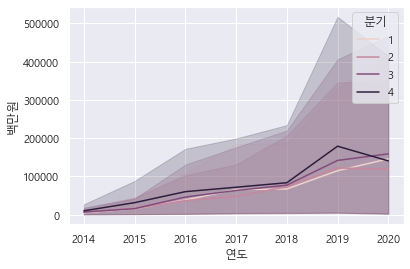

Q6. 화장품 판매액에 대한 기간별 금액 데이터 시각화

<AxesSubplot:xlabel='기간', ylabel='백만원'>

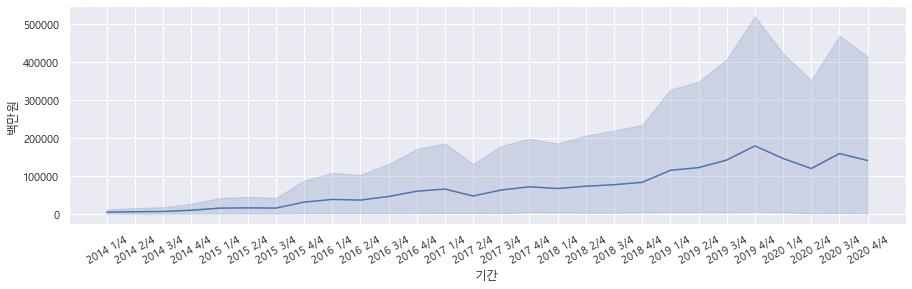

Q7. 국가 대륙별로 다른 색상으로 표현해보기.

Index(['국가(대륙)별', '상품군별', '판매유형별', '기간', '백만원', '연도', '분기'], dtype='object')

<AxesSubplot:xlabel='기간', ylabel='백만원'>

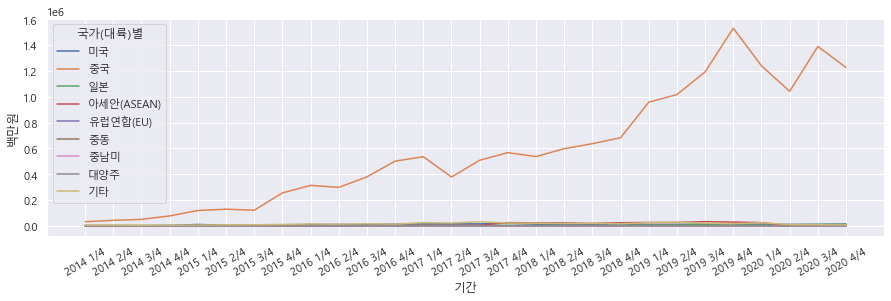

Q8. 중국을 제외하고 국가별로 다른 색상으로 표현하기.

<AxesSubplot:xlabel='기간', ylabel='백만원'>

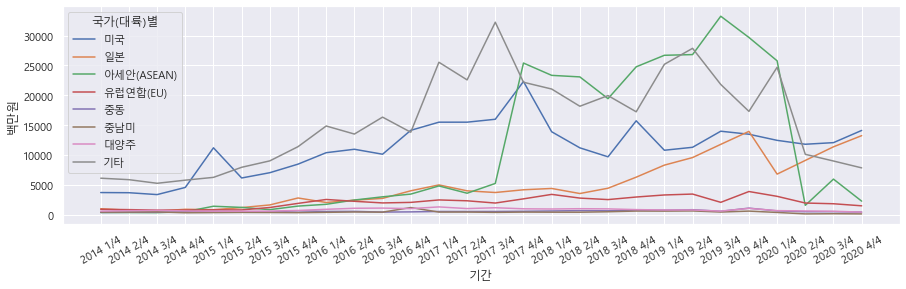

Q9. 판매유형별 화장품 판매액에 대한 기간별 금액 데이터를 시각화하기(Line plot)

<AxesSubplot:xlabel='기간', ylabel='백만원'>

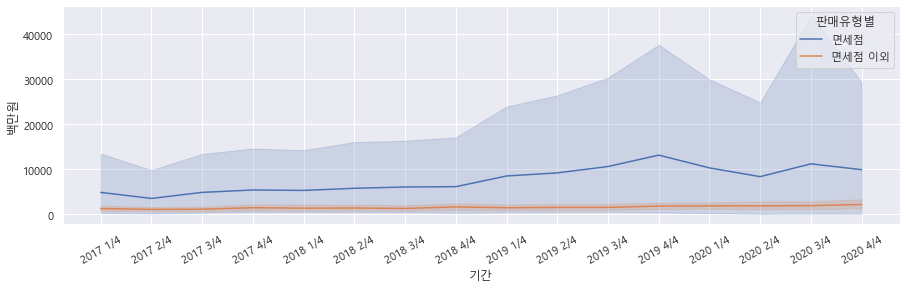

Q10. 면세점 이외의 데이터들도 증가 했는지 확인해보기

<AxesSubplot:xlabel='기간', ylabel='백만원'>

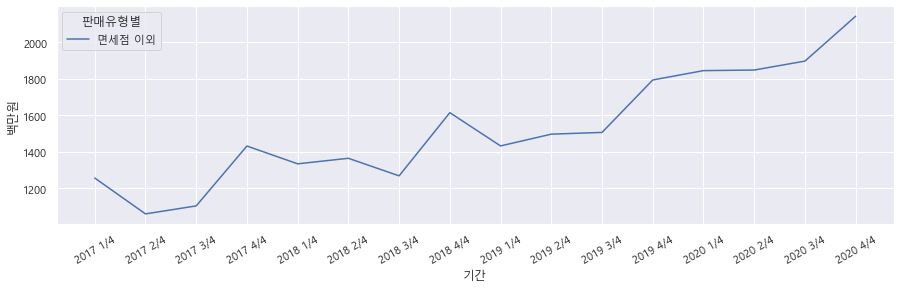

# 의류 및 패션관련 상품 온라인 쇼핑 해외 직접 판매액

Q11. df_fasion 변수에 의류 관련 상품만 따로 담아주자.(조건1: 상품군별 == '의류 및 패션 관련상품', 조건2: 판매유형별 == '계')

Q12. 국가별 기간에 따른 금액 데이터 시각화

<AxesSubplot:xlabel='기간', ylabel='백만원'>

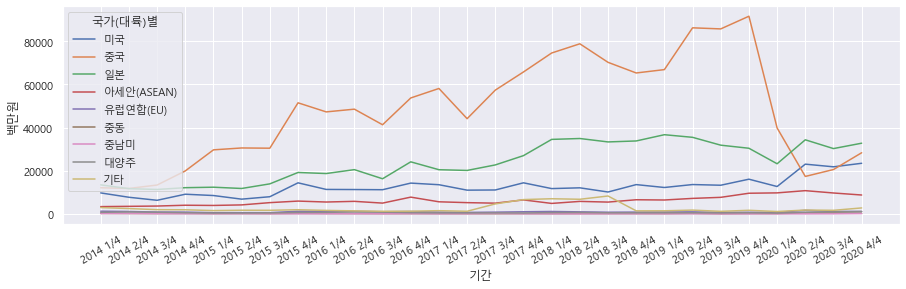

Q13. 판매유형별 기간에 따른 금액 데이터 시각화

<AxesSubplot:xlabel='기간', ylabel='백만원'>

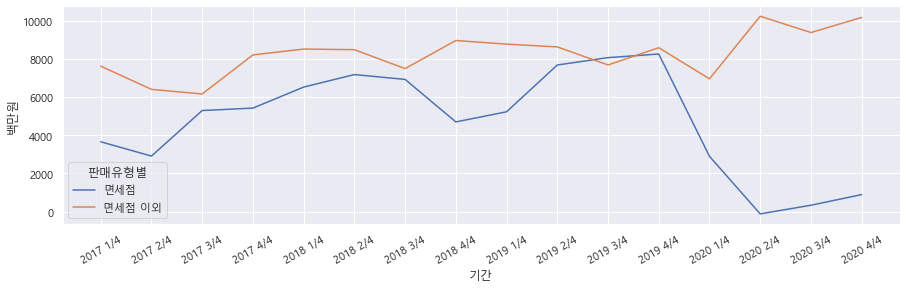

Q14. 국가대륙별, 연도별 합계 금액을 Pivot_table을 통해 구하기

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1
...,...,...,...,...,...,...,...
12396,유럽연합(EU),의류 및 패션 관련상품,계,2020 4/4,1210.0,2020,4
12441,중동,의류 및 패션 관련상품,계,2020 4/4,400.0,2020,4
12486,중남미,의류 및 패션 관련상품,계,2020 4/4,249.0,2020,4
12531,대양주,의류 및 패션 관련상품,계,2020 4/4,1233.0,2020,4


연도,2014,2015,2016,2017,2018,2019,2020
국가(대륙)별,,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0,7734.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0,3686.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0,81297.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0,39313.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0,5045.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0,120817.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0,106318.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0,611.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0,1767.0


Q15. Heatmap을 통해 연도별, 국가별 합계 금액을 시각적으로 표현하기

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

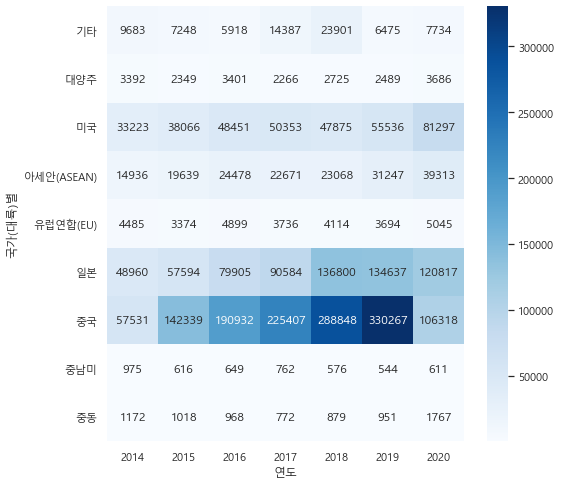